__Use PYTHON’s Multinomial Naïve Bayes__ algorithm to build models to classify the customer reviews by   
(1) sentiment (positive or negative)   
(2) authenticity (true or fake, lie detection)  

For each of the two classification tasks, use MNB to build the models, and evaluate them using 10-fold cross validation methods. (5-fold is fine too) 

__Use CountVectorizer and Python. Create labeled data. Train the NB model and test it.__ 

__As part of your Results section__: For each model (lie detection and sentiment classification), report the 20 most indicative words that the models have learned. 

__As part of your Results (the techy part) and Conclusions (the non-techy part) include discussion of__: Based on these words, do you think the models have learned the concepts (lie or sentiment) that they are expected to learn?

__As Part of Results__: Also, compare the difficulty level of sentiment classification vs. lie detection. Discuss whether you believe computers can detect fake reviews by the words.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 1000)

In [3]:
reviews = pd.read_csv('deception_data_converted_final.tsv', sep='\t')

In [4]:
reviews.shape

(92, 3)

In [5]:
reviews.sample(5, random_state=6)

,lie,sentiment,review
55,f,p,"'Two days ago, I went to the rooftop restaurant in NYC that served brunch. it was one of the best brunch that I have ever had. The view from the table was serene and I could see both the the Hudson River and the East River with outstanding views of Empire State Building, the Chryslers tower, Freedom tower and the Central park. A great place with great food and a perplexing view'"
20,f,n,"'Usually, I use Yelp to find restaurant. The Yelp would give restaurant \'stars\' to divide them into different level. And it has own map to direct you to the right place. This summer, I use it to search a subway shop in New York city, and then it give me a best choice. I followed the map to that store, and then I was surprised. It is a butcher\'s which sell ham gammon. I can not find any subway in this store. When I asked the shop assistant, he said that you can bought ham to do subway by yourself.'"
23,t,n,"'Pizza Hut Syracuse, NY The only thing worth going here for is the lunch salad bar. The decor is very dated and the pizza is GREESY. Tables and bathroom are dirty. Waitstaff seem to have low expectations of service.'"
30,t,n,"'I went to Applebees (regrettably) once and it was a train-wreck. The server was in a terrible mood, the beers arrived after the dinner was delivered, the appetizer was wrong, food was bad, the check was wrong, and there were barely any other people inside! I was pretty baffled at how so many things just went wrong in the whole process, the restaurant wasn\'t even busy. '"
0,f,n,"'Mike\'s Pizza High Point, NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza, not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.'"


Summary:
   * 92 instances
   * labels are located at fisrt two columns, one is for `lie`; the other is for `sentiment`
   * back slash and apostrophe have to be removed

In [6]:
def clean_str(string):
    """
    expect: a string with leading and trailing apostrophe and a back slash within the string
    ex:"'I found worm \in one of the dishes.'"
    modify: Remove the trailing and leading apostrophe and back slash
    return: return a string
    """
    temp = re.sub(r'\\', '', string)
    result = temp.strip("'")
    return result

In [7]:
sentiment_mapper = {'n':0,'p':1}
lie_mapper = {'t': 0, 'f': 1}   # true = 0 ; fake = 1
reviews['review'] = reviews.review.map(clean_str)
reviews['lie_num'] = reviews.lie.map(lie_mapper)
reviews['sentiment_num'] = reviews.sentiment.map(sentiment_mapper)

In [8]:
reviews.sample(5, random_state=6)

,lie,sentiment,review,lie_num,sentiment_num
55,f,p,"Two days ago, I went to the rooftop restaurant in NYC that served brunch. it was one of the best brunch that I have ever had. The view from the table was serene and I could see both the the Hudson River and the East River with outstanding views of Empire State Building, the Chryslers tower, Freedom tower and the Central park. A great place with great food and a perplexing view",1,1
20,f,n,"Usually, I use Yelp to find restaurant. The Yelp would give restaurant 'stars' to divide them into different level. And it has own map to direct you to the right place. This summer, I use it to search a subway shop in New York city, and then it give me a best choice. I followed the map to that store, and then I was surprised. It is a butcher's which sell ham gammon. I can not find any subway in this store. When I asked the shop assistant, he said that you can bought ham to do subway by yourself.",1,0
23,t,n,"Pizza Hut Syracuse, NY The only thing worth going here for is the lunch salad bar. The decor is very dated and the pizza is GREESY. Tables and bathroom are dirty. Waitstaff seem to have low expectations of service.",0,0
30,t,n,"I went to Applebees (regrettably) once and it was a train-wreck. The server was in a terrible mood, the beers arrived after the dinner was delivered, the appetizer was wrong, food was bad, the check was wrong, and there were barely any other people inside! I was pretty baffled at how so many things just went wrong in the whole process, the restaurant wasn't even busy.",0,0
0,f,n,"Mike's Pizza High Point, NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza, not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.",1,0


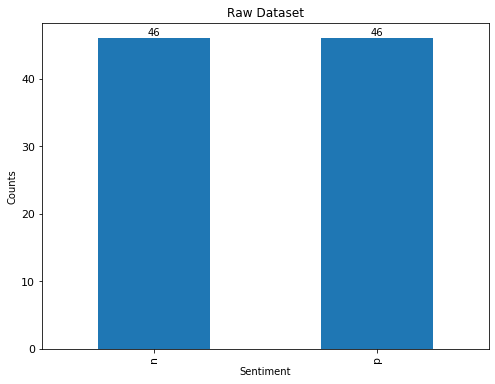

In [9]:
reviews.sentiment.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11)
plt.title('Raw Dataset', size=12)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(2):
    plt.text(x = i - 0.03 , y = reviews.sentiment.value_counts().values[i] + 0.4, 
             s = reviews.sentiment.value_counts().values[i])
plt.show()

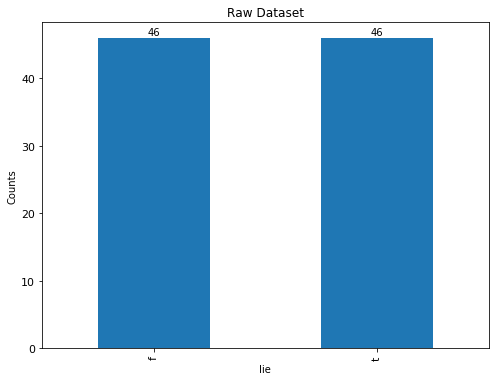

In [10]:
reviews.lie.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11)
plt.title('Raw Dataset', size=12)
plt.xlabel('lie')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(2):
    plt.text(x = i - 0.03 , y = reviews.lie.value_counts().values[i] + 0.4, 
             s = reviews.lie.value_counts().values[i])
plt.show()

## Sentiment

In [11]:
# define X and y
X = reviews.review
y = reviews.sentiment_num

In [12]:
# check the 
print(X.shape)
print(y.shape)

(92,)
(92,)


### Holdout set technique: Train/test split

In [13]:
from sklearn.model_selection import train_test_split # test_size=0.25 in default
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,)

#### Features Contain Stop Words

In [14]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
%%time
# create a document-term matrix from all of the training data
X_train_dtm = vect.fit_transform(X_train)
print('X_train_dtm shape: {}'.format(X_train_dtm.shape))
X_test_dtm = vect.transform(X_test)
print('X_test_dtm shape: {}'.format(X_test_dtm.shape))

X_train_dtm shape: (69, 1159)
X_test_dtm shape: (23, 1159)
Wall time: 8.98 ms


In [16]:
print('There are {} tokens'.format(len(vect.get_feature_names())))
print(vect.get_feature_names()[:50])

There are 1159 tokens
['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', 'abc', 'about', 'abruptly', 'acceptable', 'accord', 'acknowledge', 'actually', 'ad', 'add', 'additional', 'affordable', 'aforementioned', 'after', 'afternoon', 'again', 'aghast', 'ago', 'air', 'albert', 'all', 'almost', 'along', 'already', 'also', 'although', 'always', 'am', 'amazing', 'ambiance', 'ambient', 'america', 'american', 'amount', 'an', 'and', 'angry', 'another', 'any', 'anybody']


In [17]:
# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [18]:
%%time
# Train the model and make a prediction
nb.fit(X_train_dtm.toarray(), y_train)
y_pred_class = nb.predict(X_test_dtm.toarray())

Wall time: 3.99 ms


In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred_class)*100, 2)))

Accuracy: 86.96%


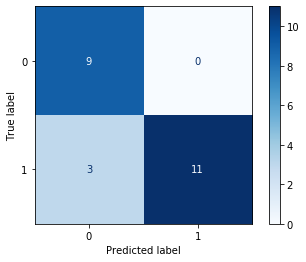

In [20]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
maxtix = plot_confusion_matrix(nb, X_test_dtm.toarray(), y_test, cmap='Blues', values_format='.3g')

In [21]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, digits=4))

              precision    recall  f1-score   support

           0     0.7500    1.0000    0.8571         9
           1     1.0000    0.7857    0.8800        14

    accuracy                         0.8696        23
   macro avg     0.8750    0.8929    0.8686        23
weighted avg     0.9022    0.8696    0.8711        23



#### Features Not Contain Stop Words

In [22]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect_stop = CountVectorizer(stop_words='english')
vect_stop

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [23]:
%%time
# create a document-term matrix from all of the training data
X_train_dtm = vect_stop.fit_transform(X_train)
print('X_train_dtm shape: {}'.format(X_train_dtm.shape))
X_test_dtm = vect_stop.transform(X_test)
print('X_test_dtm shape: {}'.format(X_test_dtm.shape))

X_train_dtm shape: (69, 980)
X_test_dtm shape: (23, 980)
Wall time: 8.98 ms


In [24]:
print('There are {} tokens'.format(len(vect_stop.get_feature_names())))
print(vect.get_feature_names()[:50])

There are 980 tokens
['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', 'abc', 'about', 'abruptly', 'acceptable', 'accord', 'acknowledge', 'actually', 'ad', 'add', 'additional', 'affordable', 'aforementioned', 'after', 'afternoon', 'again', 'aghast', 'ago', 'air', 'albert', 'all', 'almost', 'along', 'already', 'also', 'although', 'always', 'am', 'amazing', 'ambiance', 'ambient', 'america', 'american', 'amount', 'an', 'and', 'angry', 'another', 'any', 'anybody']


In [25]:
# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [26]:
%%time
# Train the model and make a prediction
nb.fit(X_train_dtm.toarray(), y_train)
y_pred_class = nb.predict(X_test_dtm.toarray())

Wall time: 1.99 ms


In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred_class)*100, 2)))

Accuracy: 91.3%


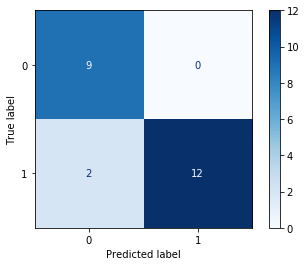

In [28]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
maxtix = plot_confusion_matrix(nb, X_test_dtm.toarray(), y_test, cmap='Blues', values_format='.3g')

In [29]:
reviews.loc[y_test.index, 'sentiment']

59    p
73    p
44    n
56    p
74    p
81    p
84    p
53    p
54    p
39    n
40    n
31    n
80    p
27    n
38    n
55    p
10    n
2     n
91    p
89    p
48    p
19    n
86    p
Name: sentiment, dtype: object

In [30]:
y_test

59    1
73    1
44    0
56    1
74    1
81    1
84    1
53    1
54    1
39    0
40    0
31    0
80    1
27    0
38    0
55    1
10    0
2     0
91    1
89    1
48    1
19    0
86    1
Name: sentiment_num, dtype: int64

In [31]:
y_test.value_counts()

1    14
0     9
Name: sentiment_num, dtype: int64

In [32]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, digits=4))

              precision    recall  f1-score   support

           0     0.8182    1.0000    0.9000         9
           1     1.0000    0.8571    0.9231        14

    accuracy                         0.9130        23
   macro avg     0.9091    0.9286    0.9115        23
weighted avg     0.9289    0.9130    0.9140        23



In [33]:
result = (y_test.value_counts()[0]/y_test.shape[0])
print('Base model(null model) for sentiment prediction in testing set: {}%'.format(round(result*100, 2)))

Base model(null model) for sentiment prediction in testing set: 39.13%


#### K-fold Cross-validation

In [34]:
import numpy as np
np.random.seed(1)
print('Base model(null model) for sentiment prediction: {}%'.format((y.value_counts()/y.shape[0])[0]))

Base model(null model) for sentiment prediction: 0.5%


5 folds

In [35]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer(stop_words='english')
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=5, scoring='accuracy').mean()
print('Accuracy: {}%'.format(round(result*100, 2)))

Accuracy: 80.35%
Wall time: 63.8 ms


In [36]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer(stop_words='english')
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=5, scoring='recall').mean()
print('Recall: {}%'.format(round(result*100, 2)))

Recall: 88.89%
Wall time: 42.9 ms


10 folds

In [37]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer(stop_words='english')
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=10, scoring='accuracy').mean()
print('Accuracy: {}%'.format(round(result*100, 2)))

Accuracy: 82.67%
Wall time: 34 ms


In [38]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer(stop_words='english')
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=10, scoring='recall').mean()
print('Recall: {}%'.format(round(result*100, 2)))

Recall: 89.0%
Wall time: 85 ms


#### Feature Ranking in MultinomialNB

In [39]:
X_tokens = vect_cv.get_feature_names()

In [40]:
# examine the first 50 tokens
print(X_tokens[0:50])

['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', '90', 'abc', 'abruptly', 'absolutely', 'acceptable', 'accord', 'acknowledge', 'actual', 'actually', 'ad', 'add', 'additional', 'adorable', 'affordable', 'aforementioned', 'afternoon', 'aghast', 'ago', 'agreed', 'air', 'albert', 'alfredo', 'amazing', 'ambiance', 'ambient', 'amer', 'america', 'american', 'angry', 'answering', 'anybody', 'appalled', 'appalling', 'appealing', 'appetizer', 'applebee', 'applebees', 'applied', 'appropriative']


In [41]:
# examine the last 50 tokens
print(X_tokens[-50:])

['warm', 'warmly', 'wasn', 'watch', 'watched', 'water', 'watery', 'way', 'wearing', 'week', 'weekend', 'weird', 'welcoming', 'went', 'weren', 'west', 'whatsoever', 'whelming', 'white', 'wifi', 'wine', 'wings', 'winning', 'winter', 'wish', 'woman', 'won', 'wonderful', 'wondering', 'words', 'worked', 'world', 'worm', 'worrying', 'worse', 'worst', 'worth', 'wouldn', 'wqr', 'wreck', 'write', 'written', 'wrong', 'wrote', 'xyz', 'yeah', 'yelp', 'yesterday', 'york', 'yuenan']


In [42]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [43]:
%%time 
# train the model using X_dtm
nb.fit(X_dtm, y)

Wall time: 997 µs


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
nb.feature_count_
# rows represent classes, columns represent tokens
print("Shape: {}".format(nb.feature_count_.shape))

Shape: (2, 1254)


In [45]:
# number of times each token appears across all 'neg' class
neg_token_count = nb.feature_count_[0, :]
neg_token_count

array([3., 1., 5., ..., 1., 2., 0.])

In [46]:
# number of times each token appears across all 'pos' class
pos_token_count = nb.feature_count_[1, :]
pos_token_count

array([1., 1., 1., ..., 0., 1., 1.])

In [47]:
# create a DataFrame of tokens with their separate atheism, forsale and med counts
tokens = pd.DataFrame({'token':X_tokens, 'neg':neg_token_count, 
                       'pos':pos_token_count}).set_index('token')

In [48]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

,neg,pos
token,,
visiting,0.0,2.0
oil,2.0,0.0
stains,1.0,0.0
couldn,1.0,0.0
deep,0.0,1.0


In [49]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([46., 46.])

In [50]:
# Naive Bayes counts the number of observations for all classes
Total_vocab = tokens.shape[0]
print('Number of vocabulary learned: {}'.format(Total_vocab))

Number of vocabulary learned: 1254


In [51]:
# calculate the condition probabilities using Laplace smoother (N + |vocab|)
# https://scikit-learn.org/stable/modules/naive_bayes.html
tokens['neg'] = (tokens.neg +1) / (nb.class_count_[0]+Total_vocab)
tokens['pos'] = (tokens.pos +1) / (nb.class_count_[1]+Total_vocab)
tokens['pos_ratio'] = tokens.pos/tokens.neg
tokens['neg_ratio'] = tokens.neg/tokens.pos
tokens = tokens.sort_values('pos_ratio', ascending=False)
tokens.head(20)

,neg,pos,pos_ratio,neg_ratio
token,,,,
amazing,0.000769,0.011538,15.00,0.066667
best,0.003077,0.022308,7.25,0.137931
makes,0.000769,0.004615,6.00,0.166667
cream,0.000769,0.004615,6.00,0.166667
restaurants,0.000769,0.004615,6.00,0.166667
love,0.000769,0.004615,6.00,0.166667
noodle,0.000769,0.004615,6.00,0.166667
friendly,0.001538,0.007692,5.00,0.200000
sushi,0.000769,0.003846,5.00,0.200000


In [52]:
print('most indicative words for negative sentiment')
tokens.loc[:,'neg'].sort_values(ascending=False)[:20]

most indicative words for negative sentiment


token
food          0.033077
restaurant    0.031538
place         0.023077
went          0.018462
minutes       0.016923
ordered       0.014615
good          0.011538
service       0.011538
just          0.010769
experience    0.010769
terrible      0.010000
order         0.010000
came          0.010000
salad         0.010000
like          0.010000
took          0.009231
waitress      0.008462
wait          0.008462
waiter        0.008462
friends       0.007692
Name: neg, dtype: float64

In [53]:
print('most indicative words for positive sentiment')
tokens.loc[:,'pos'].sort_values(ascending=False)[:20]

most indicative words for positive sentiment


token
food          0.030000
restaurant    0.028462
best          0.022308
great         0.016923
good          0.013846
amazing       0.011538
service       0.011538
place         0.011538
went          0.009231
fresh         0.009231
really        0.008462
experience    0.008462
like          0.008462
friends       0.007692
delicious     0.007692
sauce         0.007692
friendly      0.007692
ordered       0.007692
nice          0.007692
pizza         0.006923
Name: pos, dtype: float64

## Lie

In [54]:
# define X and y
X = reviews.review
y = reviews.lie_num

In [55]:
print(X.shape)
print(y.shape)

(92,)
(92,)


### Holdout set technique: Train/test split

In [56]:
from sklearn.model_selection import train_test_split # test_size=0.25 in default
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,)

#### Features Contain Stop Words

In [57]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [58]:
%%time
# create a document-term matrix from all of the training data
X_train_dtm = vect.fit_transform(X_train)
print('X_train_dtm shape: {}'.format(X_train_dtm.shape))
X_test_dtm = vect.transform(X_test)
print('X_test_dtm shape: {}'.format(X_test_dtm.shape))

X_train_dtm shape: (69, 1159)
X_test_dtm shape: (23, 1159)
Wall time: 9 ms


In [59]:
print('There are {} tokens'.format(len(vect.get_feature_names())))
print(vect.get_feature_names()[:50])

There are 1159 tokens
['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', 'abc', 'about', 'abruptly', 'acceptable', 'accord', 'acknowledge', 'actually', 'ad', 'add', 'additional', 'affordable', 'aforementioned', 'after', 'afternoon', 'again', 'aghast', 'ago', 'air', 'albert', 'all', 'almost', 'along', 'already', 'also', 'although', 'always', 'am', 'amazing', 'ambiance', 'ambient', 'america', 'american', 'amount', 'an', 'and', 'angry', 'another', 'any', 'anybody']


In [60]:
# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [61]:
%%time
# Train the model and make a prediction
nb.fit(X_train_dtm.toarray(), y_train)
y_pred_class = nb.predict(X_test_dtm.toarray())

Wall time: 1.02 ms


In [62]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred_class)*100, 2)))

Accuracy: 34.78%


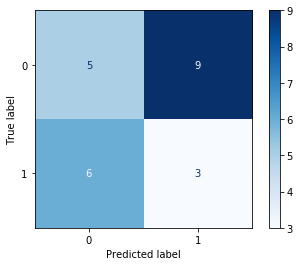

In [63]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
maxtix = plot_confusion_matrix(nb, X_test_dtm.toarray(), y_test, cmap='Blues', values_format='.3g')

In [64]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, digits=4))

              precision    recall  f1-score   support

           0     0.4545    0.3571    0.4000        14
           1     0.2500    0.3333    0.2857         9

    accuracy                         0.3478        23
   macro avg     0.3523    0.3452    0.3429        23
weighted avg     0.3745    0.3478    0.3553        23



#### Features Not Contain Stop Words

In [65]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect_stop = CountVectorizer(stop_words = "english")
vect_stop

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [66]:
%%time
# create a document-term matrix from all of the training data
X_train_dtm = vect_stop.fit_transform(X_train)
print('X_train_dtm shape: {}'.format(X_train_dtm.shape))
X_test_dtm = vect_stop.transform(X_test)
print('X_test_dtm shape: {}'.format(X_test_dtm.shape))

X_train_dtm shape: (69, 980)
X_test_dtm shape: (23, 980)
Wall time: 8.99 ms


In [67]:
print('There are {} tokens'.format(len(vect_stop.get_feature_names())))
print(vect_stop.get_feature_names()[:50])

There are 980 tokens
['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', 'abc', 'abruptly', 'acceptable', 'accord', 'acknowledge', 'actually', 'ad', 'add', 'additional', 'affordable', 'aforementioned', 'afternoon', 'aghast', 'ago', 'air', 'albert', 'amazing', 'ambiance', 'ambient', 'america', 'american', 'angry', 'anybody', 'appetizer', 'applebee', 'applebees', 'applied', 'area', 'arrive', 'arrived', 'artichoke', 'asian', 'ask', 'asked', 'asking', 'assistant', 'ate', 'atmosphere', 'attendant']


In [68]:
# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [69]:
%%time
# Train the model and make a prediction
nb.fit(X_train_dtm.toarray(), y_train)
y_pred_class = nb.predict(X_test_dtm.toarray())

Wall time: 2.99 ms


In [70]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred_class)*100, 2)))

Accuracy: 43.48%


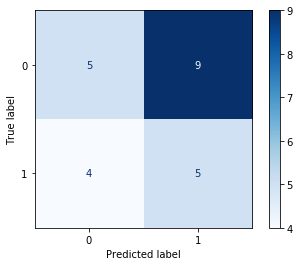

In [71]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
maxtix = plot_confusion_matrix(nb, X_test_dtm.toarray(), y_test, cmap='Blues', values_format='.3g')

In [72]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[5, 9],
       [4, 5]], dtype=int64)

In [73]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, digits=4))

              precision    recall  f1-score   support

           0     0.5556    0.3571    0.4348        14
           1     0.3571    0.5556    0.4348         9

    accuracy                         0.4348        23
   macro avg     0.4563    0.4563    0.4348        23
weighted avg     0.4779    0.4348    0.4348        23



In [74]:
y_test.value_counts()

0    14
1     9
Name: lie_num, dtype: int64

In [75]:
reviews.loc[[59, 73, 44, 56, 74, 81, 84, 53, 54, 39, 40, 31, 80, 27, 38, 55, 10,
             2, 91, 89, 48, 19, 86], 'lie']

59    f
73    t
44    t
56    f
74    t
81    t
84    t
53    f
54    f
39    t
40    t
31    t
80    t
27    t
38    t
55    f
10    f
2     f
91    t
89    t
48    f
19    f
86    t
Name: lie, dtype: object

In [76]:
y_test

59    1
73    0
44    0
56    1
74    0
81    0
84    0
53    1
54    1
39    0
40    0
31    0
80    0
27    0
38    0
55    1
10    1
2     1
91    0
89    0
48    1
19    1
86    0
Name: lie_num, dtype: int64

In [77]:
result = (y_test.value_counts()[0]/y_test.shape[0])
print('Base model(null model) for lie prediction in testing set: {}%'.format(round(result*100, 2)))

Base model(null model) for lie prediction in testing set: 60.87%


#### K-fold Cross-validation

In [78]:
import numpy as np
np.random.seed(1)
print('Base model(null model) for lie prediction: {}%'.format((y.value_counts()/y.shape[0])[0]))

Base model(null model) for lie prediction: 0.5%


5 folds

In [79]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer(stop_words = "english")
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=5, scoring='accuracy').mean()
print('Accuracy: {}%'.format(round(result*100, 2)))

Accuracy: 61.93%
Wall time: 53.4 ms


The 5-fold cross-validation model has 59.71 accuracy rate which is higher than the base model. 

In [80]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer(stop_words = "english")
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=5, scoring='recall').mean()
print('Recall: {}%'.format(round(result*100, 2)))

Recall: 65.33%
Wall time: 30.9 ms


10 folds

In [81]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer(stop_words = "english")
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=10, scoring='accuracy').mean()
print('Accuracy: {}%'.format(round(result*100, 2)))

Accuracy: 56.44%
Wall time: 33.9 ms


In [82]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer(stop_words = "english")
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=10, scoring='recall').mean()
print('Recall: {}%'.format(round(result*100, 2)))

Recall: 61.5%
Wall time: 37.9 ms


#### Feature Ranking in MultinomialNB

In [83]:
X_tokens = vect_cv.get_feature_names()

In [84]:
# examine the first 50 tokens
print(X_tokens[0:50])

['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', '90', 'abc', 'abruptly', 'absolutely', 'acceptable', 'accord', 'acknowledge', 'actual', 'actually', 'ad', 'add', 'additional', 'adorable', 'affordable', 'aforementioned', 'afternoon', 'aghast', 'ago', 'agreed', 'air', 'albert', 'alfredo', 'amazing', 'ambiance', 'ambient', 'amer', 'america', 'american', 'angry', 'answering', 'anybody', 'appalled', 'appalling', 'appealing', 'appetizer', 'applebee', 'applebees', 'applied', 'appropriative']


In [85]:
# examine the last 50 tokens
print(X_tokens[-50:])

['warm', 'warmly', 'wasn', 'watch', 'watched', 'water', 'watery', 'way', 'wearing', 'week', 'weekend', 'weird', 'welcoming', 'went', 'weren', 'west', 'whatsoever', 'whelming', 'white', 'wifi', 'wine', 'wings', 'winning', 'winter', 'wish', 'woman', 'won', 'wonderful', 'wondering', 'words', 'worked', 'world', 'worm', 'worrying', 'worse', 'worst', 'worth', 'wouldn', 'wqr', 'wreck', 'write', 'written', 'wrong', 'wrote', 'xyz', 'yeah', 'yelp', 'yesterday', 'york', 'yuenan']


In [86]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [87]:
%%time 
# train the model using X_dtm
nb.fit(X_dtm, y)

Wall time: 998 µs


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [88]:
nb.feature_count_
# rows represent classes, columns represent tokens
print("Shape: {}".format(nb.feature_count_.shape))

Shape: (2, 1254)


In [89]:
# number of times each token appears across all 'fake' class
fake_token_count = nb.feature_count_[0, :]
fake_token_count

array([2., 0., 0., ..., 0., 1., 0.])

In [90]:
# number of times each token appears across all 'true' class
true_token_count = nb.feature_count_[1, :]
true_token_count

array([2., 2., 6., ..., 1., 2., 1.])

In [91]:
# create a DataFrame of tokens with their separate atheism, forsale and med counts
tokens = pd.DataFrame({'token':X_tokens, 'fake':fake_token_count, 
                       'true':true_token_count}).set_index('token')

In [92]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

,fake,true
token,,
visiting,0.0,2.0
oil,0.0,2.0
stains,1.0,0.0
couldn,1.0,0.0
deep,1.0,0.0


In [93]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([46., 46.])

In [94]:
# Naive Bayes counts the number of observations for all classes
Total_vocab = tokens.shape[0]
print('Number of vocabulary learned: {}'.format(Total_vocab))

Number of vocabulary learned: 1254


In [95]:
# calculate the condition probabilities using Laplace smoother (N + |vocab|)
# https://scikit-learn.org/stable/modules/naive_bayes.html
tokens['fake'] = (tokens.fake + 1) / (nb.class_count_[0]+Total_vocab)
tokens['true'] = (tokens.true + 1) / (nb.class_count_[1]+Total_vocab)
tokens['fake_ratio'] = tokens.fake/tokens.true
tokens['true_ratio']=tokens.true/tokens.fake
tokens = tokens.sort_values('fake_ratio', ascending=False)
tokens.head(20)

,fake,true,fake_ratio,true_ratio
token,,,,
tofu,0.005385,0.000769,7.0,0.142857
makes,0.004615,0.000769,6.0,0.166667
tables,0.003846,0.000769,5.0,0.200000
coffee,0.003846,0.000769,5.0,0.200000
calling,0.003846,0.000769,5.0,0.200000
shrimp,0.003077,0.000769,4.0,0.250000
sommalier,0.003077,0.000769,4.0,0.250000
old,0.003077,0.000769,4.0,0.250000
case,0.003077,0.000769,4.0,0.250000


In [96]:
print('most indicative words for fake review')
tokens.loc[:,'fake'].sort_values(ascending=False)[:20]

most indicative words for fake review


token
food          0.033077
restaurant    0.033077
place         0.019231
good          0.015385
went          0.013077
best          0.010769
ordered       0.010769
great         0.010000
people        0.008462
time          0.008462
friends       0.007692
service       0.007692
waitress      0.007692
salad         0.006923
just          0.006923
like          0.006923
cheese        0.006923
really        0.006923
experience    0.006923
bar           0.006154
Name: fake, dtype: float64

In [97]:
print('most indicative words for true review')
tokens.loc[:,'true'].sort_values(ascending=False)[:20]

most indicative words for true review


token
food          0.030000
restaurant    0.026923
service       0.015385
place         0.015385
went          0.014615
minutes       0.014615
best          0.014615
experience    0.012308
plate         0.011538
ordered       0.011538
like          0.011538
great         0.010769
good          0.010000
amazing       0.007692
really        0.007692
friends       0.007692
fresh         0.007692
dishes        0.007692
order         0.007692
wait          0.007692
Name: true, dtype: float64